In [3]:
import numpy as np
import matplotlib.pyplot as plt
data = np.load('galaxy_catalogue.npy')

(array([260.,   0.,   0.,   0.,   0., 260.,   0.,   0.,   0., 260.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

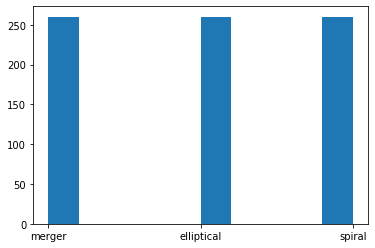

In [4]:
plt.hist(data['class'])

In [52]:
features = np.empty(shape=(len(data), 13))
features[:, 0] = data['u-g']
features[:, 1] = data['g-r']
features[:, 2] = data['r-i']
features[:, 3] = data['i-z']
features[:, 4] = data['ecc']
features[:, 5] = data['m4_u']
features[:, 6] = data['m4_g']
features[:, 7] = data['m4_r']
features[:, 8] = data['m4_i']
features[:, 9] = data['m4_z']
features[:, 10] = data['petroR50_u']/data['petroR90_u']
features[:, 11] = data['petroR50_r']/data['petroR90_r']
features[:, 12] = data['petroR50_z']/data['petroR90_z']

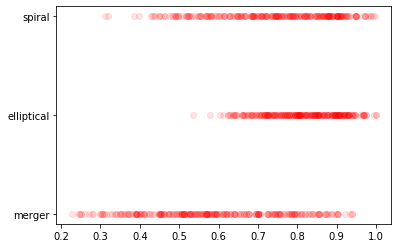

In [10]:
import numpy as np
import matplotlib.pyplot as plt
data = np.load('galaxy_catalogue.npy')
plt.plot(data['ecc'],data['class'],'ro',alpha=0.1)

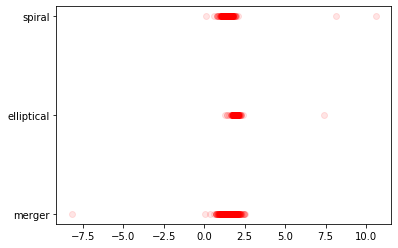

In [11]:
plt.plot(data['u-g'],data['class'],'ro',alpha=0.1)

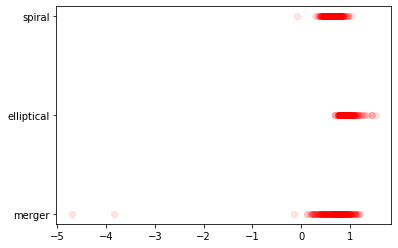

In [12]:
plt.plot(data['g-r'],data['class'],'ro',alpha=0.1)

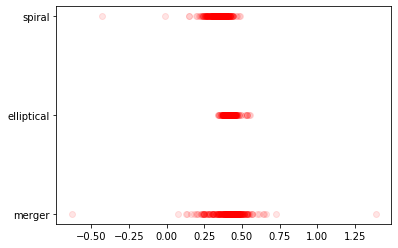

In [13]:
plt.plot(data['r-i'],data['class'],'ro',alpha=0.1)

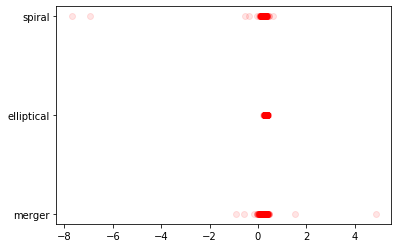

In [14]:
plt.plot(data['i-z'],data['class'],'ro',alpha=0.1)

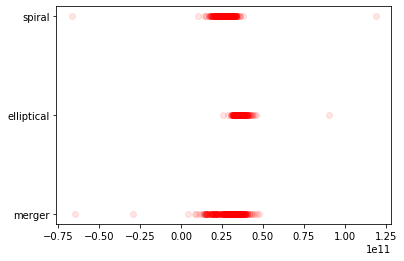

In [16]:
plt.plot((data['u-g']+data['g-r']+data['r-i']+data['i-z'])*10**10,data['class'],'ro',alpha=0.1)

In [1]:
#from the above graphs we can see that classification of galaxies cannot be done based on just one variable
#Hence we use a decision tree

In [2]:
import pandas as pd

In [5]:
df=pd.DataFrame(data)

In [7]:
df.head()


,u-g,g-r,r-i,i-z,ecc,m4_u,m4_g,m4_r,m4_i,m4_z,petroR50_u,petroR50_r,petroR50_z,petroR90_u,petroR90_r,petroR90_z,class
0,1.85765,0.67158,0.42310,0.30610,0.585428,2.251946,2.339849,2.380652,2.359738,2.395528,3.095123,3.818919,3.826230,5.174814,8.263009,11.477340,merger
1,1.74259,0.86085,0.44927,0.28851,0.749812,2.031566,2.084156,2.092272,2.124075,2.133154,1.430436,1.422533,1.385727,3.732712,3.416921,3.330347,merger
2,2.10697,0.96710,0.56810,0.33747,0.630089,1.992887,2.450746,2.473116,2.465324,2.438683,3.099957,3.623704,3.463300,9.110857,8.354343,11.265390,merger
3,1.22840,0.60446,0.39049,0.28913,0.668999,2.056115,2.182252,2.309510,2.391414,2.472397,3.627267,4.063471,3.717708,9.580675,12.202420,11.826220,merger
4,1.80792,0.78124,0.45528,0.35067,0.500170,2.259167,2.194723,2.264567,2.334713,2.352568,3.256751,3.153533,2.254511,9.206746,9.790146,6.636931,merger


In [8]:
df.describe()

,u-g,g-r,r-i,i-z,ecc,m4_u,m4_g,m4_r,m4_i,m4_z,petroR50_u,petroR50_r,petroR50_z,petroR90_u,petroR90_r,petroR90_z
count,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000
mean,1.633556,0.751285,0.390027,0.256630,0.713827,-36.228336,-10.499354,-23.280043,-36.084795,-48.904677,-46.026529,4.897747,-34.147368,-38.642822,12.625589,-27.091879
std,0.680241,0.333986,0.094902,0.434369,0.171010,619.454396,358.104842,506.113635,619.462662,714.833597,715.052758,5.647410,619.598004,715.634265,9.482342,620.075967
min,-8.202350,-4.708600,-0.630590,-7.698340,0.226894,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,0.617535,-9999.000000,-9999.000000,1.031904,-9999.000000
25%,1.333080,0.620432,0.353687,0.227997,0.592427,2.124926,2.238136,2.303345,2.327275,2.329166,2.896251,2.884019,2.553682,7.056056,8.101448,7.145191
50%,1.701755,0.789610,0.400985,0.294780,0.744386,2.269386,2.351759,2.380019,2.394285,2.390121,4.391504,3.929862,3.449929,10.743275,10.509180,9.423079
75%,1.914082,0.905282,0.430363,0.326920,0.852673,2.390789,2.420319,2.439145,2.448875,2.449683,6.148377,5.450743,4.832378,14.975497,14.321407,13.388955
max,10.624040,1.539170,1.390840,4.879330,0.999812,26.009380,2.724017,2.737767,2.728628,2.730472,61.133380,134.394700,89.220090,112.493900,162.428100,116.535700


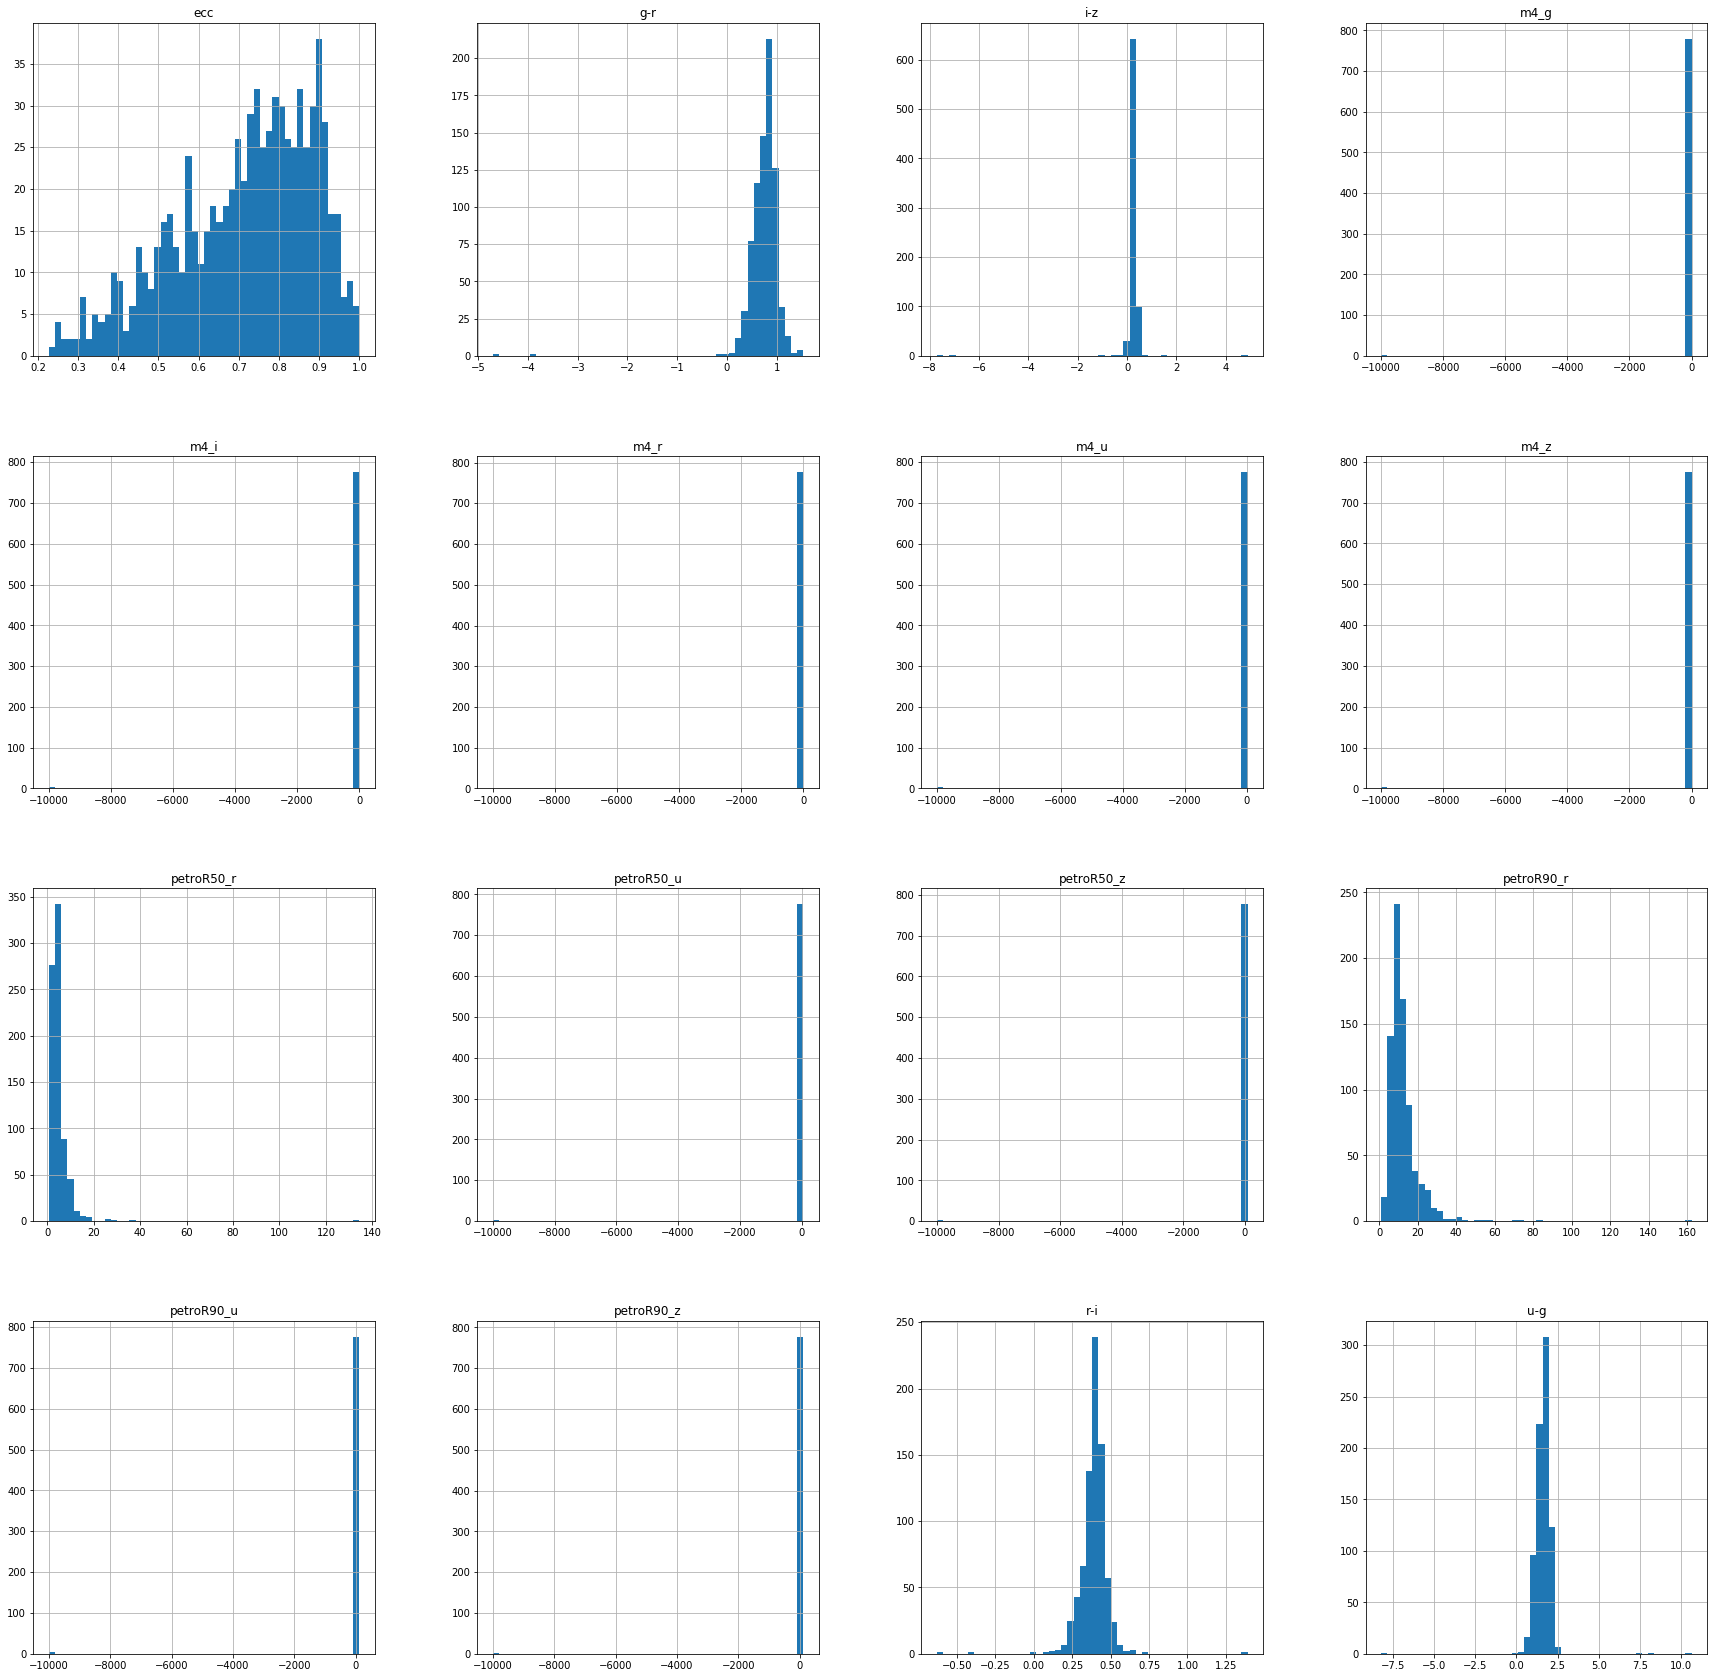

In [9]:
df.hist(bins=50,figsize=(30,30))
plt.show()

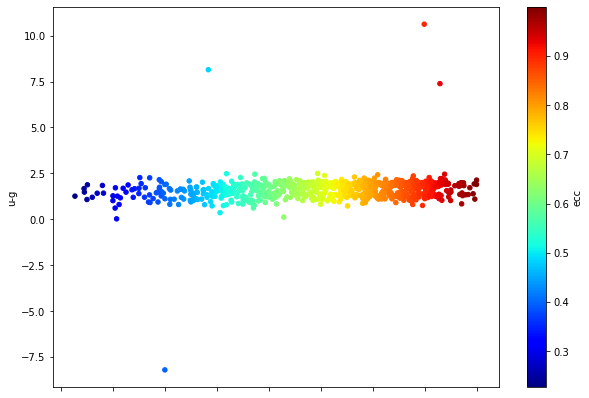

In [10]:
df.plot(kind="scatter",x='ecc',y='u-g',figsize=(10,7),c='ecc',cmap=plt.get_cmap("jet"),colorbar=True)
plt.show()

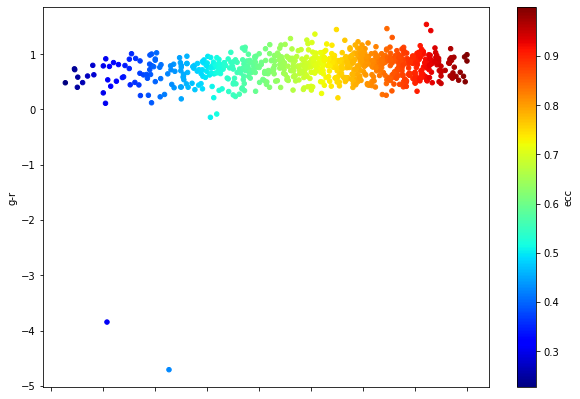

In [11]:
df.plot(kind="scatter",x='ecc',y='g-r',figsize=(10,7),c='ecc',cmap=plt.get_cmap("jet"),colorbar=True)
plt.show()

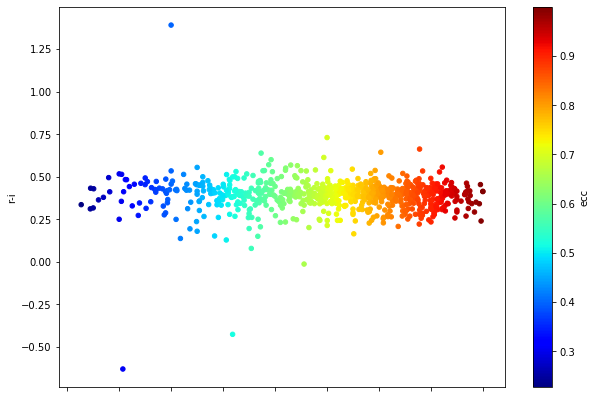

In [12]:
df.plot(kind="scatter",x='ecc',y='r-i',figsize=(10,7),c='ecc',cmap=plt.get_cmap("jet"),colorbar=True)
plt.show()

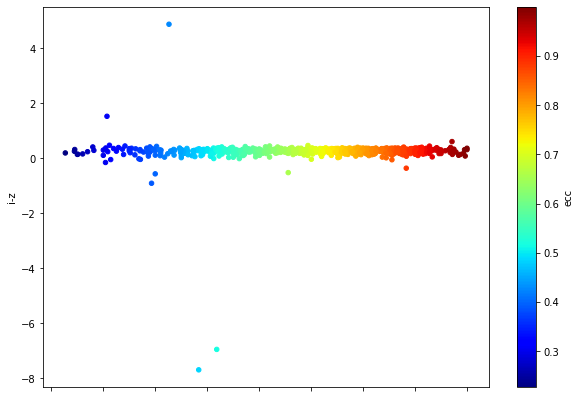

In [13]:
df.plot(kind="scatter",x='ecc',y='i-z',figsize=(10,7),c='ecc',cmap=plt.get_cmap("jet"),colorbar=True)
plt.show()